# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
import pandas as pd
import json
from pandas.io.json import json_normalize

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

json.load(open('data/world_bank_projects.json'))
df = pd.read_json('data/world_bank_projects.json')
df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

Ten Countries With the Most Projects
Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


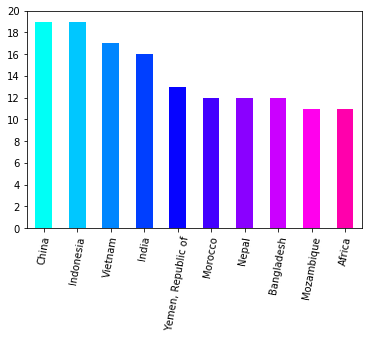

In [9]:
# Find the 10 countries with most projects

top_countries = df.loc[:, ['countryname', 'countryshortname', 'countrycode']]
top_countries['count'] = top_countries.groupby(['countryname'])['countryshortname'].transform('count')

print('Ten Countries With the Most Projects')
print(top_countries['countryname'].value_counts()[:10])
#print(top_countries.head(10))

color = cm.hsv(np.linspace(.5,.9, 10))
top_countries['countryshortname'].value_counts()[:10].plot(x='countryshortname', 
                                                           y='count', kind='bar', 
                                                           yticks=range(0,22,2), 
                                                           color=color, rot=80)

Ten Most Common Themes (by theme name)
name
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
dtype: int64


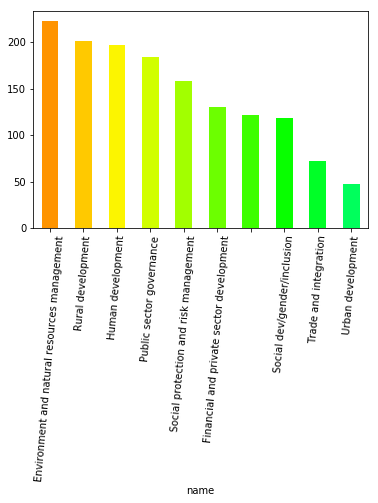

In [10]:
# Find the top 10 major project themes (using column 'mjtheme_namecode')

themes = pd.DataFrame(columns=['code', 'name'])

for row in df.mjtheme_namecode:
    themes = themes.append(json_normalize(row))

# Oh, crap.  This removes the 122 '' from the most common.  Move this line?
# themes.replace(r'^\s*$', np.nan, regex=True, inplace=True)
themes.reset_index(drop=True, inplace=True)

print('Ten Most Common Themes (by theme name)')
themes_group = themes.groupby('name').size().sort_values(ascending=False)
print(themes_group.head(10))

color = cm.hsv(np.linspace(.1,.4, 10))
themes_group.iloc[:10].plot(kind='bar', yticks=range(0,230,50), color=color, rot=85)

In [11]:
print('Ten Most Common Themes (by theme code)')
themes_code = themes.groupby('code').size().sort_values(ascending=False)
print(themes_code.head(10))

Ten Most Common Themes (by theme code)
code
11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
dtype: int64


Ten Most Common Themes (by theme name)
name_fixed
Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
dtype: int64


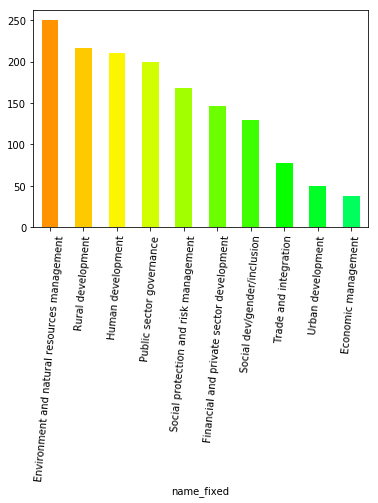

In [12]:
# In 2. above you will notice that some entries have only the code and the name is missing. 
# Create a dataframe with the missing names filled in.

# (dict)

codes_dict = {}

for row in df.mjtheme_namecode:
    for key, item in enumerate(row):
        if item['code'] not in codes_dict and item['name'] != '':
            codes_dict[item['code']] = item['name']

#print(sorted(codes_dict.items()))

themes.replace(r'^\s*$', np.nan, regex=True, inplace=True)
themes_fixed = themes
themes_fixed['name_fixed'] = themes_fixed.name.fillna(themes_fixed.code.map(codes_dict))

#print(themes_fixed.name_fixed)



print('Ten Most Common Themes (by theme name)')
themes_group_fixed = themes_fixed.groupby('name_fixed').size().sort_values(ascending=False)
print(themes_group_fixed.head(10))

color = cm.hsv(np.linspace(.1,.4, 10))
themes_group_fixed.iloc[:10].plot(kind='bar', yticks=range(0,300,50), color=color, rot=85)

In [13]:
# In 2. above you will notice that some entries have only the code and the name is missing. 
# Create a dataframe with the missing names filled in.

# (list of tuples)

codes = []
names = []

for row in df.mjtheme_namecode:
    for key, item in enumerate(row):
        #print(item['code'], item['name'])
        if item['name'] != '':
            codes.append(item['code'])
            names.append(item['name'])

codes_set = sorted(set(zip(codes, names)))

print(codes_set)

[('1', 'Economic management'), ('10', 'Rural development'), ('11', 'Environment and natural resources management'), ('2', 'Public sector governance'), ('3', 'Rule of law'), ('4', 'Financial and private sector development'), ('5', 'Trade and integration'), ('6', 'Social protection and risk management'), ('7', 'Social dev/gender/inclusion'), ('8', 'Human development'), ('9', 'Urban development')]
